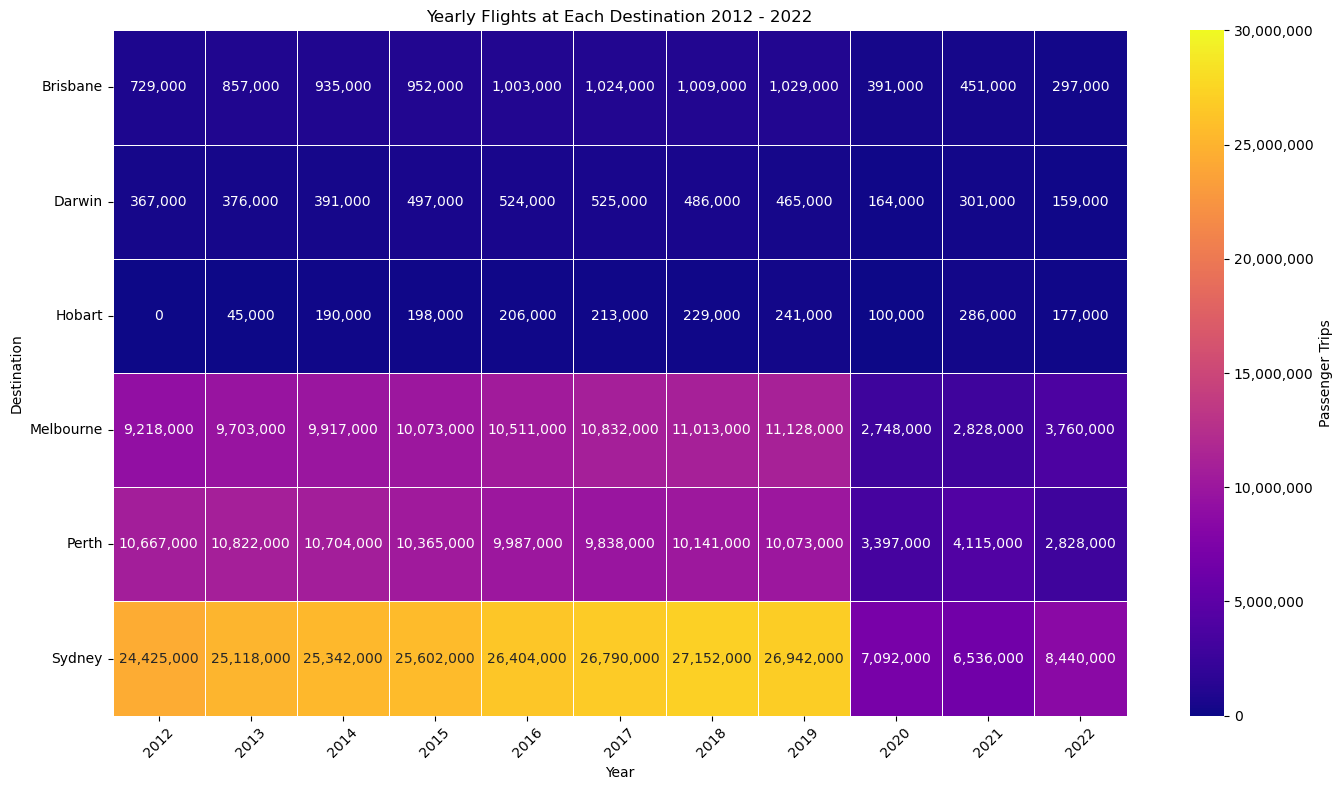

In [1]:
#data visualisation 1
#import Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# load data set
file_path = 'data/aus_air_traffic.csv'
df = pd.read_csv(file_path)

# Define the list of cities and the year range
cities = ["Brisbane", "Sydney", "Melbourne", "Adelaide", "Hobart", "Perth", "Darwin"]
years = range(2012, 2023)

# Filter the data frame
filtered_df = df[(df['Destination'].isin(cities)) & (df['Year'].isin(years))]


# Group by 'Destination' and 'Year' for the total flights
yearly_flights = filtered_df.groupby(['Destination', 'Year'])['Passenger_Trips'].sum().reset_index()


# Pivot the data to have 'Destination' as rows, 'Year' as columns, and 'Passenger_Trips' as values
heatmap_data = yearly_flights.pivot(index='Destination', columns='Year', values='Passenger_Trips')

# formating values (round to nearest thousand)
heatmap_data = heatmap_data.apply(lambda x: round(x, -3))


# Create the heatmap using Seaborn
  # Adjust the figure size to make the plot larger
plt.figure(figsize=(14, 8))
  # Adjust annotation size, type, "," format clarity, and labels... 
ax = sns.heatmap(heatmap_data, cmap='plasma', annot=True, fmt=',.0f', linewidths=.5, cbar_kws={'label': 'Passenger Trips'}, annot_kws={"size": 10}, vmin=0, vmax=30000000) 

# Customize the color bar ticks and labels
colorbar = ax.collections[0].colorbar
ticks = colorbar.get_ticks()
colorbar.set_ticks(ticks)
tick_labels = ['{:,}'.format(int(tick)) for tick in ticks]
colorbar.set_ticklabels(tick_labels)

  # Imploying titles, labels and formatting for the table
plt.title('Yearly Flights at Each Destination 2012 - 2022')
plt.xlabel('Year')
plt.ylabel('Destination')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal
plt.tight_layout()  # Adjust layout to make room for labels

plt.show()

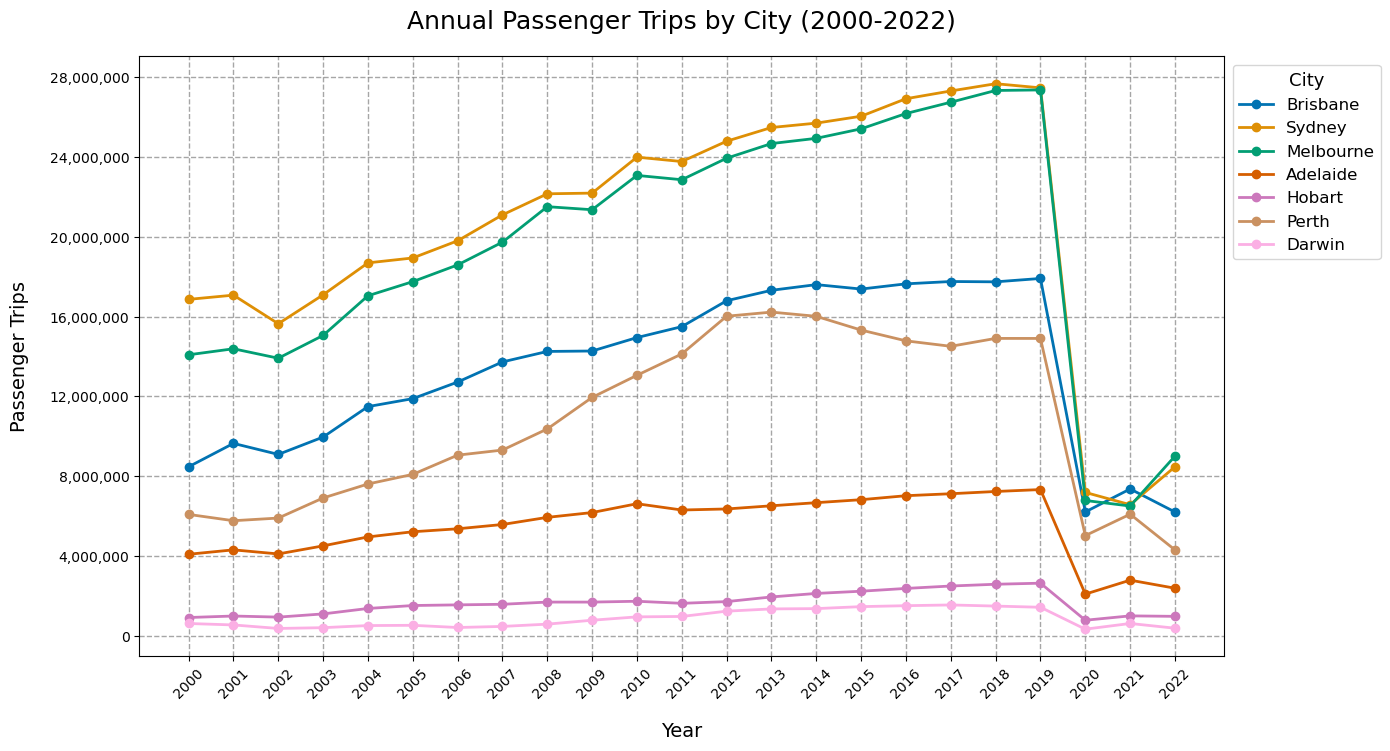

In [2]:
# Data visualisation 2

# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Load the dataset
file_path = 'data/aus_air_traffic.csv'
df = pd.read_csv(file_path)

# Define the cities and years
cities = ["Brisbane", "Sydney", "Melbourne", "Adelaide", "Hobart", "Perth", "Darwin"]
years = range(2000, 2023)

# Define colors for each city
colors = sns.color_palette("colorblind", len(cities))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figure size

# Plot the data for each city
for city, color in zip(cities, colors):
    # Filter the DataFrame for the specified city and years
    filtered_df = df[((df['Source'] == city) | (df['Destination'] == city)) & (df['Year'].isin(years))]
    
    # Aggregate data by year and sum Passenger_Trips
    df_table = filtered_df.groupby(['Year'])['Passenger_Trips'].sum().reset_index()

    # Ensure all years are included
    df_frame = pd.DataFrame({'Year': list(years)})
    df_frame = df_frame.merge(df_table, on='Year', how='left').fillna(0)

    # Plot the data with customizations
    ax.plot(df_frame['Year'], df_frame['Passenger_Trips'], marker='o', color=color, label=city, linewidth=2)

# Add labels and title
ax.set_xlabel('Year', fontsize=14, labelpad=15)
ax.set_ylabel('Passenger Trips', fontsize=14, labelpad=15)
ax.set_title('Annual Passenger Trips by City (2000-2022)', fontsize=18, pad=20)

# Set x-axis ticks to show all years
ax.set_xticks(list(years))
ax.set_xticklabels(list(years), rotation=45)

# Add grid
ax.grid(True, color="grey", linewidth="1.0", linestyle="--", alpha=0.7)

# Set y-axis to display values correctly with more intervals
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add a legend
ax.legend(title='City', fontsize=12, title_fontsize='13', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust the space around the plot
fig.subplots_adjust(bottom=0.15, top=0.90)

plt.show()


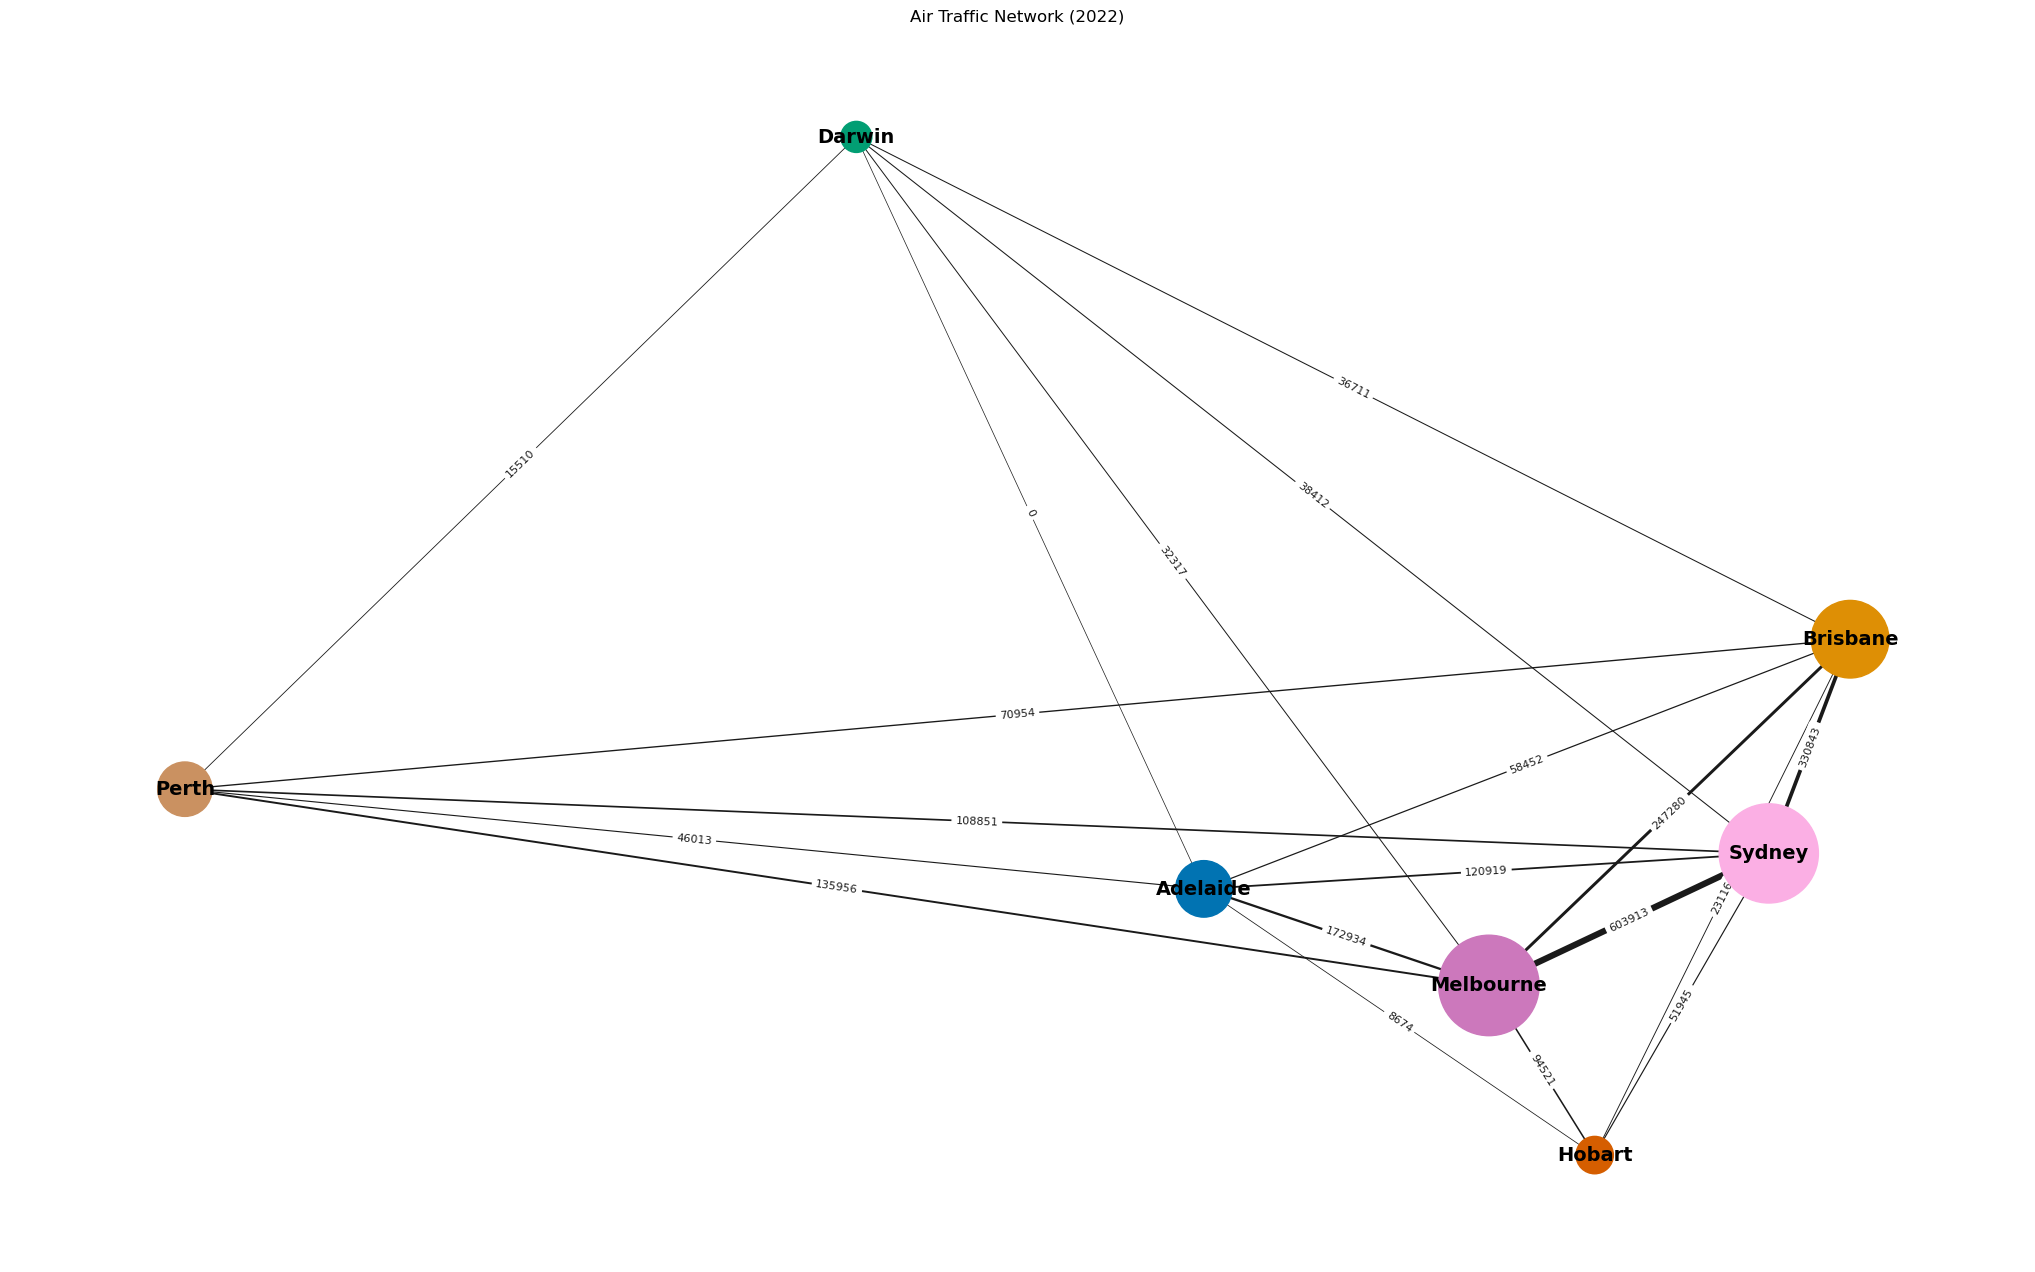

In [3]:
# Data visualisation 3

# Import libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx  # for dealing with network data
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

# Load the dataset
file_path = 'data/aus_air_traffic.csv'
df = pd.read_csv(file_path)

# Filter cities and years for 2022 only
cities = ["Brisbane", "Sydney", "Melbourne", "Adelaide", "Hobart", "Perth", "Darwin"]
filtered_df = df[
    (df['Source'].isin(cities)) & 
    (df['Destination'].isin(cities)) & 
    (df['Year'] == 2022)
]

# Create graph object from pandas dataframe
G1 = nx.from_pandas_edgelist(
    df=filtered_df,  # dataframe
    source='Source',  # name of source column
    target='Destination',  # name of target column
    edge_attr=True  # We want to keep all columns as edge attributes
)

# Set minimum node size
min_node_size = 500

# Calculate node sizes based on the sum of passenger trips
node_sizes = {node: 0 for node in G1.nodes}
for u, v, d in G1.edges(data=True):
    node_sizes[u] += d['Passenger_Trips']
    node_sizes[v] += d['Passenger_Trips']

node_size_values = list(node_sizes.values())
min_node_size_value = min(node_size_values)
normalized_node_sizes = [size / min_node_size_value * min_node_size for size in node_size_values]

# Define node positions using geographical data
cities_data_file = 'data/cities_data.csv'  # Adjust file path as per your dataset location
df_cities = pd.read_csv(cities_data_file)

# Create a dictionary for node positions
pos = {row['City']: (row['Longitude'], row['Latitude']) for idx, row in df_cities.iterrows()}

# Normalize edge widths based on the number of trips
max_trips = filtered_df['Passenger_Trips'].max()
min_trips = filtered_df['Passenger_Trips'].min()

# Define a function to normalize the widths
def normalize_width(trips, min_trips, max_trips):
    return 0.5 + (trips - min_trips) / (max_trips - min_trips) * 4  # Widths between 1 and 5

# Get edge widths based on the number of trips
edge_widths = [normalize_width(d['Passenger_Trips'], min_trips, max_trips) for u, v, d in G1.edges(data=True)]

# Assign different colors to each node using the 'colorblind' palette
node_colors = sns.color_palette("colorblind", len(G1.nodes))
color_map = {node: color for node, color in zip(G1.nodes, node_colors)}

# Draw the graph
fig, ax = plt.subplots(figsize=(26, 16))
nx.draw(G1, pos, 
        width=edge_widths,
        node_size=normalized_node_sizes, 
        node_color=[color_map[node] for node in G1.nodes], 
        font_size=10, 
        font_color='#1A1A1A',
        font_weight='bold', 
        edge_color='#1A1A1A', 
        ax=ax)

# Draw labels
nx.draw_networkx_labels(G1, pos, font_size=14, font_weight="bold")

# Add edge labels for passenger trips
edge_labels = {(u, v): f'{d["Passenger_Trips"]}' for u, v, d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels, font_size=8, font_color='#1A1A1A')

# Set plot title
plt.title('Air Traffic Network (2022)')

plt.show()
